In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### Load data

In [5]:
ii = range(10,79)
fnames = [r'/home/data_transfer/data_from_windows/20191130/Bead1/DMdata/DMdata_{}.h5'.format(i) for i in ii]
bdfs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrodes data
No electrode

<IPython.core.display.Javascript object>


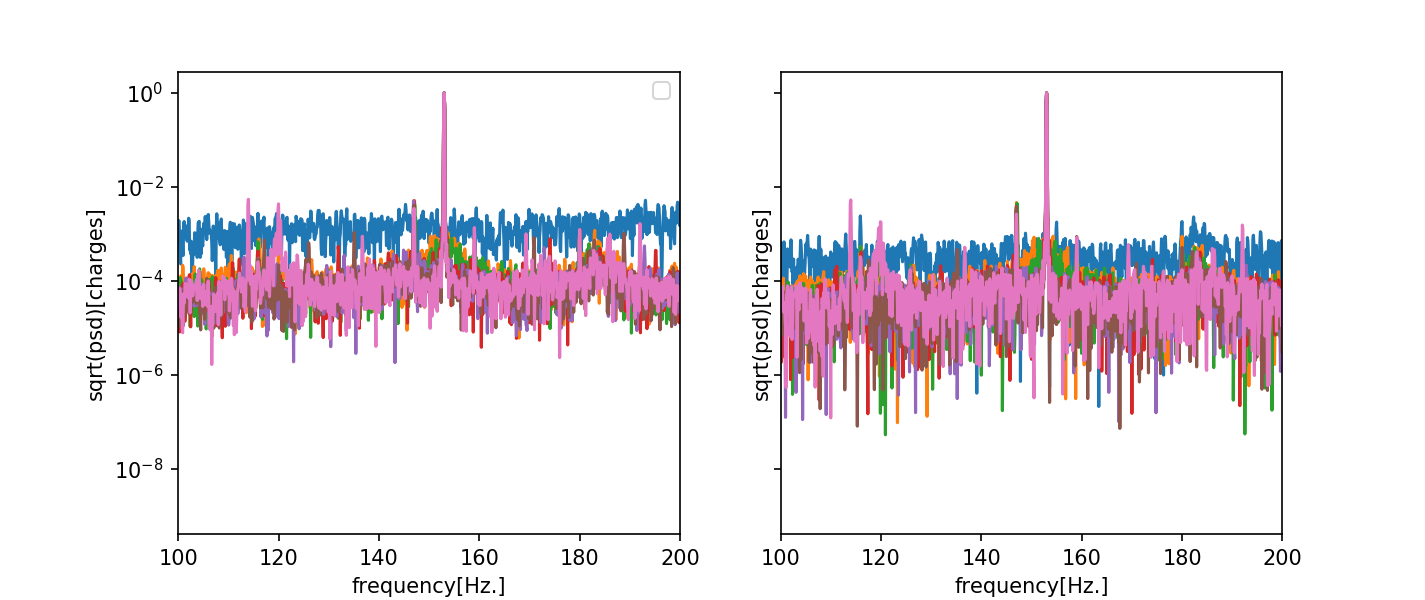

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (100, 200),
 Text(0.5, 0, 'frequency[Hz.]')]

In [6]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
for bb, bb1 in zip(bdfs[::10], bdfs[1::10]):
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft2 /= fft2[freq2==153]
    
#     fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=5000)
    fft3, freq3 = matplotlib.mlab.csd(bb.x2, bb1.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].legend()
ax[0].set(xlim=(100,200), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')
ax[1].set(xlim=(100,200), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [7]:
DManalyzer.BDFs = bdfs
DManalyzer.estimate_noise()

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  8.415976745953737
x3 noise rms:  3.0298328463890245


In [8]:
DManalyzer.estimate_noise()  # estimate noise of x2 and x3
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  8.415976745953738
x3 noise rms:  3.029832846389025
***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  1.40e-04
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  1.04e-03
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  4.01e-04
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  2.05e-04
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  5.85e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  1.16e-03
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  1.86e-04
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  9.73e-04
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  1.25e-0

In [9]:
resp_x2 = np.array([np.std(bb.response_at_freq2('x',drive_freq=153)*50000) for bb in DManalyzer.BDFs])
resp_x3 = np.array([np.std(bb.response_at_freq3('x',drive_freq=153)/6) for bb in DManalyzer.BDFs])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


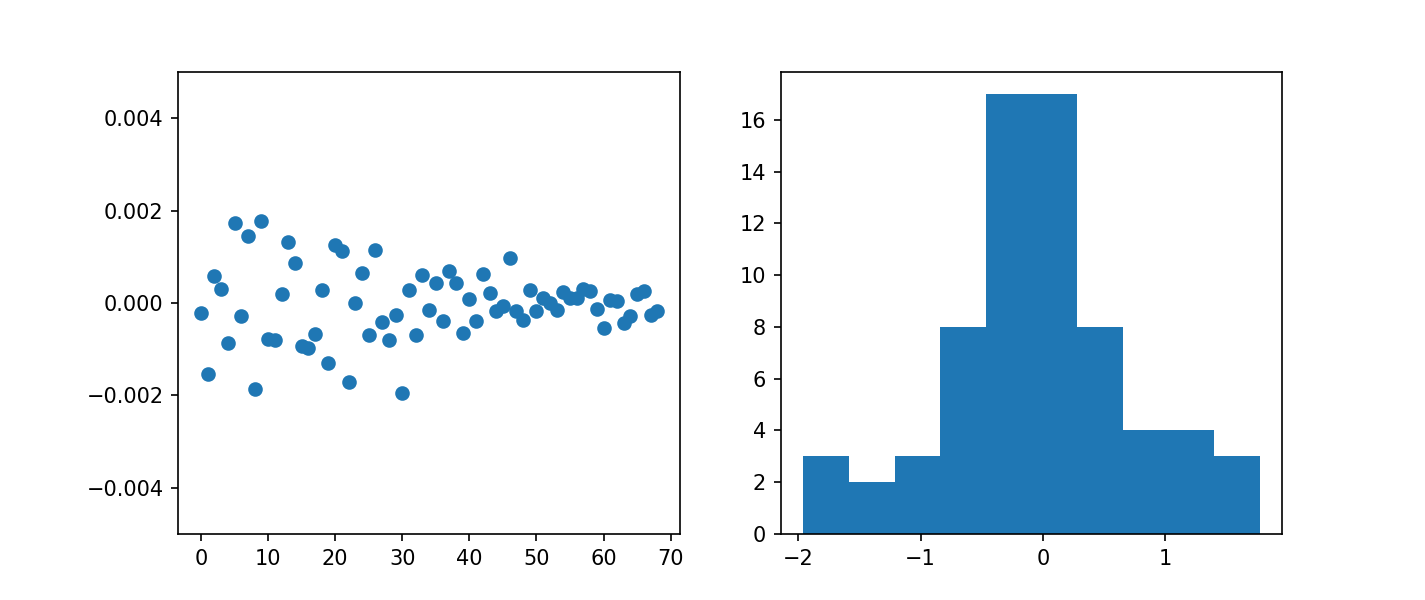

avergae:  -3.204373436020211e-05 std:  0.0007709923666049645
standard error:  9.281657377635476e-05


In [10]:
A = [res_.values[0] for res_ in DManalyzer.minimizer_2d_results]
Phi = [res_.values[4] for res_ in DManalyzer.minimizer_2d_results]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(A)),A/resp_x3)
ax[0].set(ylim=(-0.005,0.005))
ax[1].hist(A/resp_x3*1000)
all_vals = A/resp_x3
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

<IPython.core.display.Javascript object>


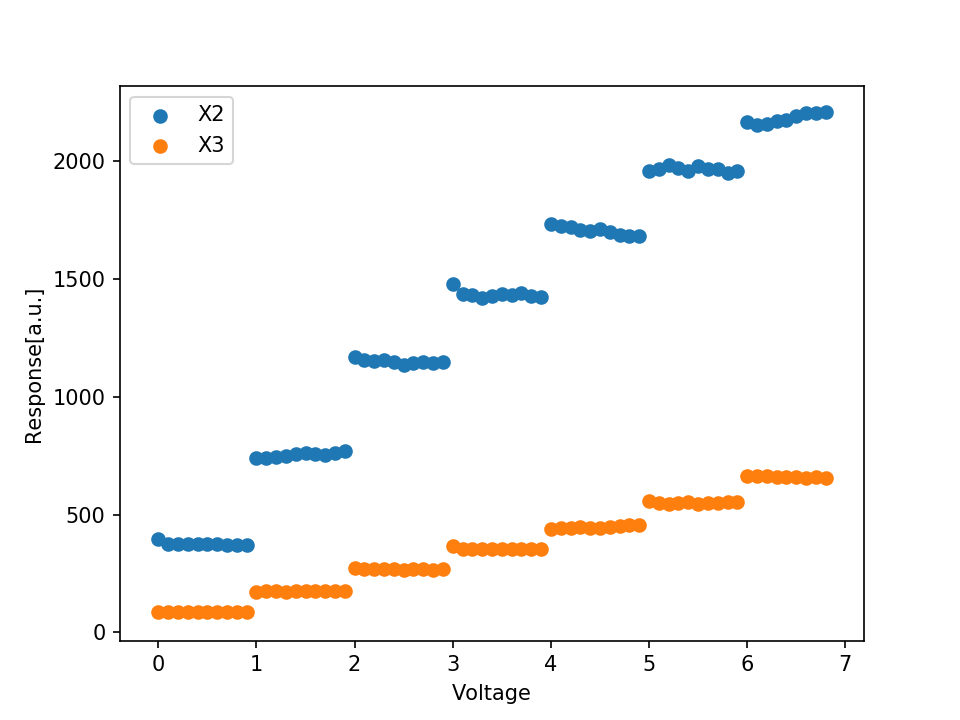

In [11]:
_,ax = plt.subplots()
ax.scatter(np.arange(len(resp_x2))/10,resp_x2, label='X2',)
ax.scatter(np.arange(len(resp_x3))/10,resp_x3, label='X3')
ax.set(xlabel='Voltage', ylabel='Response[a.u.]')
ax.legend()

In [12]:
foldername = r'/home/data_transfer/data_from_windows/20191204/Bead1/LineWidth/'
bdfs = load_dir(foldername, file_prefix='DMdata')

4  files in folder
4  files loaded


<IPython.core.display.Javascript object>


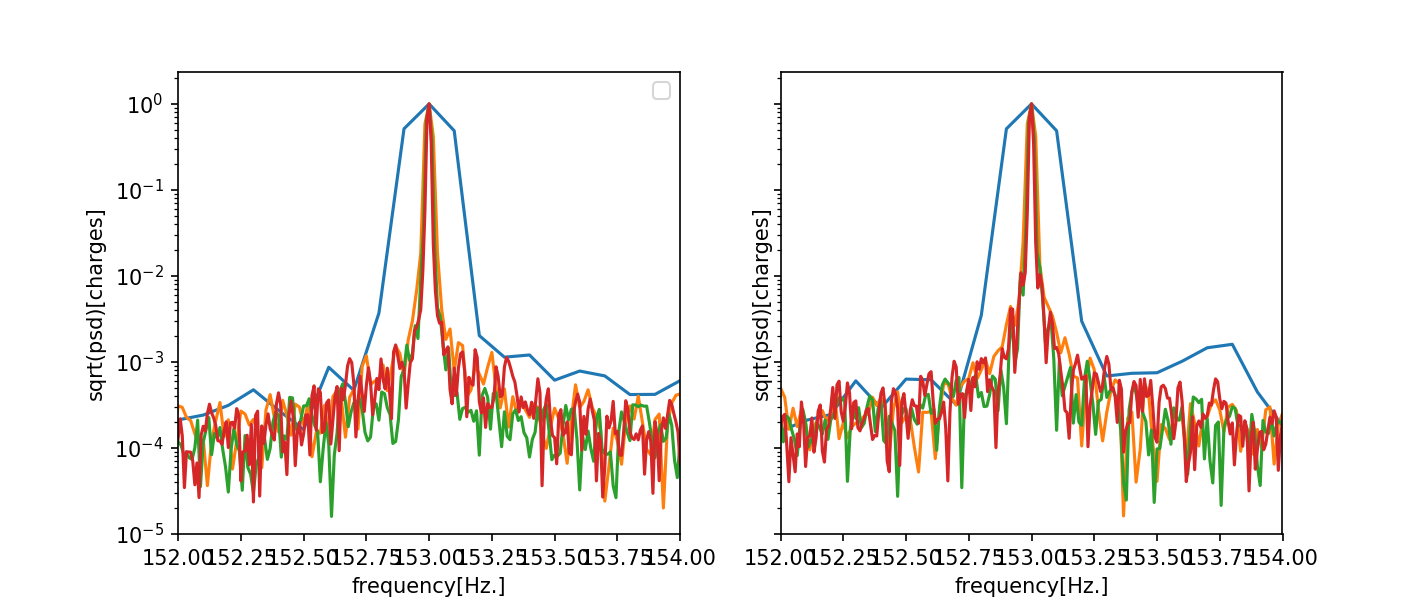

No handles with labels found to put in legend.


[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (152, 154),
 Text(0.5, 0, 'frequency[Hz.]')]

In [13]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True)
for bb in bdfs:
    fft2, freq2 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=len(bb.x2))
    fft2 /= fft2[freq2==153]
    
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=len(bb.x2))
#     fft3, freq3 = matplotlib.mlab.csd(bb.x2, bb1.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax[0].semilogy(freq2, np.sqrt(fft2))
    ax[1].semilogy(freq3, np.sqrt(fft3))
ax[0].legend()
ax[0].set(xlim=(152,154), ylim=(1e-5,None), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')
ax[1].set(xlim=(152,154), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')